# 0. Import Moduls

In [238]:
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T
from torchsummary import summary


In [239]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# 1.  Set Parameters

In [240]:
IMG_SIZE = 480

# 2. Load Model

In [241]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

In [242]:
model.parameters

<bound method Module.parameters of DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inp

# 3. Image Process

In [243]:
def draw_img(img_path, figsize=(8,8)):
    img = Image.open(img_path)
    img = img.resize((IMG_SIZE, int(img.height*IMG_SIZE/img.width)))
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.imshow(img)
    plt.yticks([])
    plt.xticks([])
    return img

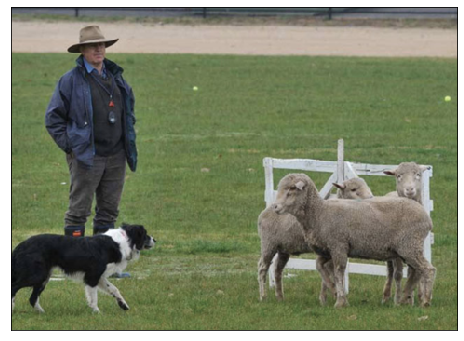

In [245]:
img = draw_img('./imgs/seg_fig1.png')

## 3-1. IMG Transfer

* T.Resize(256): Resizes theimage to size width 256
* T.ToTensor(): Converts the image to type torch.Tensor and have.values between [0,1]
* T.Normalize(mean, std) : Normalizes the image with the given mean and standard deviation

In [246]:
def img_transfer(img):
    
    # Resize and toTensor
    trf=T.Compose([
            T.Resize(IMG_SIZE),
            T.ToTensor()
    ])
    input_img = trf(img)[:3,:,:] 
    print(input_img.shape)
    
    # Normalize
    trf = T.Compose([
        T.Normalize(
        mean = [0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        )  
    ])

    input_img = trf(input_img).unsqueeze(0)
    print(input_img.shape)
    
    return input_img

In [247]:
input_img=img_transfer(img)

torch.Size([3, 480, 662])
torch.Size([1, 3, 480, 662])


## 4. Use model

* **Output shape**: [ 1, 21, N, M ]
* **1** : batch_size
* **21** : classse
* **N, M** : image size

In [248]:
out = model(input_img)['out']
print(out.shape)

torch.Size([1, 21, 480, 662])


## 4-1. Transform out values

In [249]:
out = torch.argmax(out.squeeze(), dim=0)
out = out.detach().cpu().numpy()
features=np.unique(out)

print(out.shape)
print(features)

(480, 662)
[ 0 12 15 17]


## 4-2. Draw Results

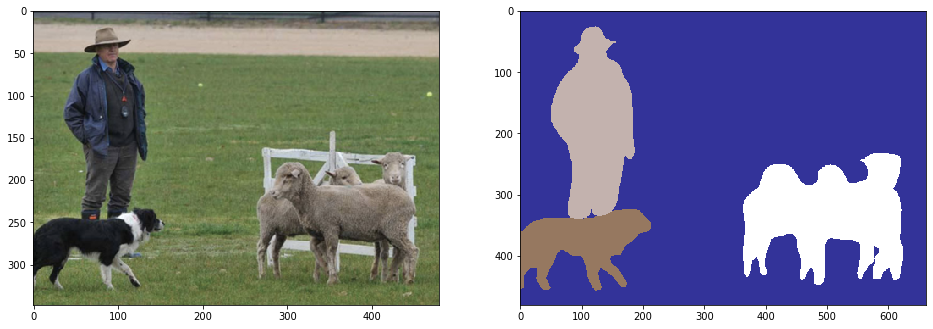

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,12))
ax[0].imshow(img)
ax[1].imshow(out, cmap='terrain')
plt.show()